# Fourier Transform and Frequency Spectrum Analysis of Signals

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq, fftshift

# Common parameters
fs = 1000  # Sampling frequency (Hz)
T = 1      # Duration (s)
t = np.arange(0, T, 1/fs)
N = len(t)

In [17]:
def plot_time_and_freq(signal, title, dtft_range=None):
    # Time-domain plot
    plt.figure(figsize=(15, 4))
    plt.subplot(1, 2, 1)
    plt.plot(t, signal)
    plt.title(f"{title} - Time Domain")
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.grid(True)

    # DTFT (Continuous Frequency Spectrum)
    w = np.linspace(-np.pi, np.pi, 2048)
    dtft = np.abs(np.fft.fftshift(np.fft.fft(signal, n=2048)))
    plt.subplot(1, 2, 2)
    freq_axis = np.fft.fftshift(np.fft.fftfreq(2048, 1/fs))
    plt.plot(freq_axis, dtft)
    plt.title(f"{title} - DTFT Spectrum")
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')
    plt.grid(True)
    if dtft_range is not None:
        plt.xlim(dtft_range)
    plt.tight_layout()
    plt.show()

In [18]:
def plot_dft(signal, title):
    # DFT (Discrete Frequency Spectrum)
    sig_fft = np.abs(fft(signal))
    freqs = fftfreq(N, 1/fs)
    plt.figure(figsize=(10, 3))
    plt.stem(freqs[:N//2], sig_fft[:N//2])
    plt.title(f"{title} - DFT Spectrum")
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')
    plt.grid(True)
    plt.show()

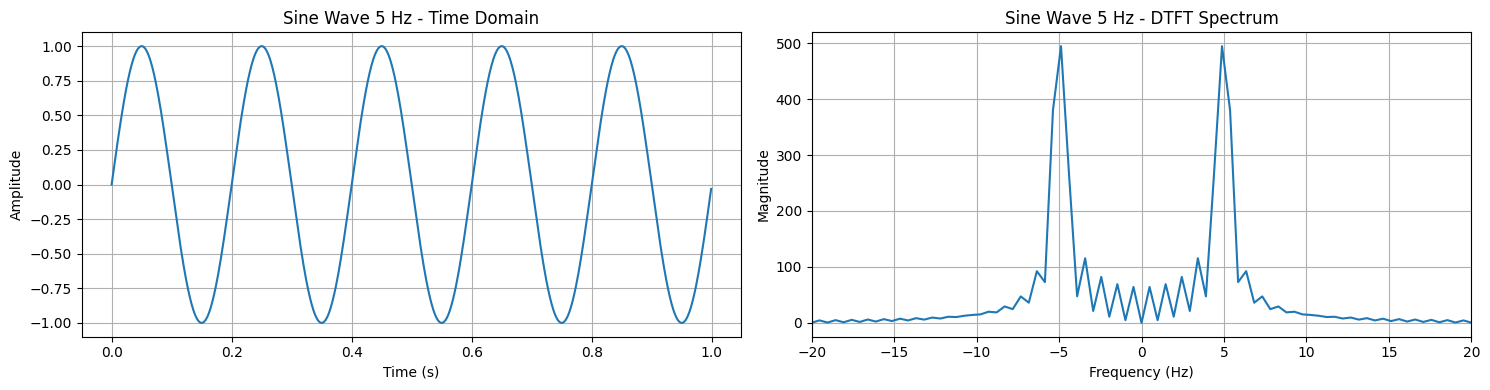

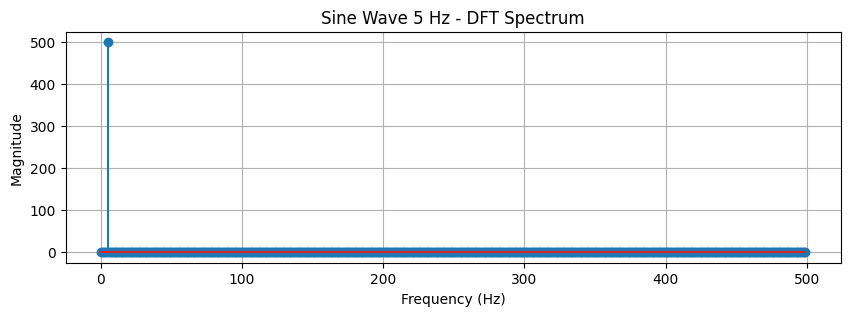

In [19]:
# Question 1: Basic Sinusoidal Signal
f1 = 5  # Frequency of sine wave (Hz)
sinusoid = np.sin(2 * np.pi * f1 * t)

plot_time_and_freq(sinusoid, f"Sine Wave {f1} Hz", dtft_range=(-20, 20))
plot_dft(sinusoid, f"Sine Wave {f1} Hz")

# Time-Domain Waveform
The top left graph displays the sinusoidal signal in the time domain.

The x-axis is time (seconds) and the y-axis is amplitude.

The waveform shows a smooth, periodic oscillation corresponding to a pure sine wave at 5 Hz, completing five full cycles in one second.

This representation is useful for visualizing the actual signal values over time.

# DTFT Spectrum (Continuous Frequency Spectrum)
The top right graph presents the Discrete-Time Fourier Transform (DTFT) magnitude spectrum.

The x-axis is frequency (Hz) and the y-axis is magnitude.

The DTFT provides a continuous frequency spectrum and shows two prominent spikes at
±
5
±5 Hz.

The spikes indicate the presence of pure frequency components at +5 Hz and -5 Hz (the sine wave has energy concentrated exactly at these frequencies).

The rest of the spectrum is nearly zero, confirming the signal is purely sinusoidal.

# DFT Spectrum (Discrete Frequency Spectrum)
The bottom graph shows the Discrete Fourier Transform (DFT) magnitude spectrum.

The x-axis is frequency (Hz) and the y-axis is magnitude.

The DFT is a sampled version of the DTFT and plots discrete frequency bins.

A dominant peak appears at 5 Hz, corresponding to the frequency of the input sine wave.

The remaining frequencies have very small magnitudes, confirming the signal is almost entirely composed of the single 5 Hz component.

Only non-negative frequencies up to the sampling rate (Nyquist frequency) are displayed, with the main energy concentrated where expected.

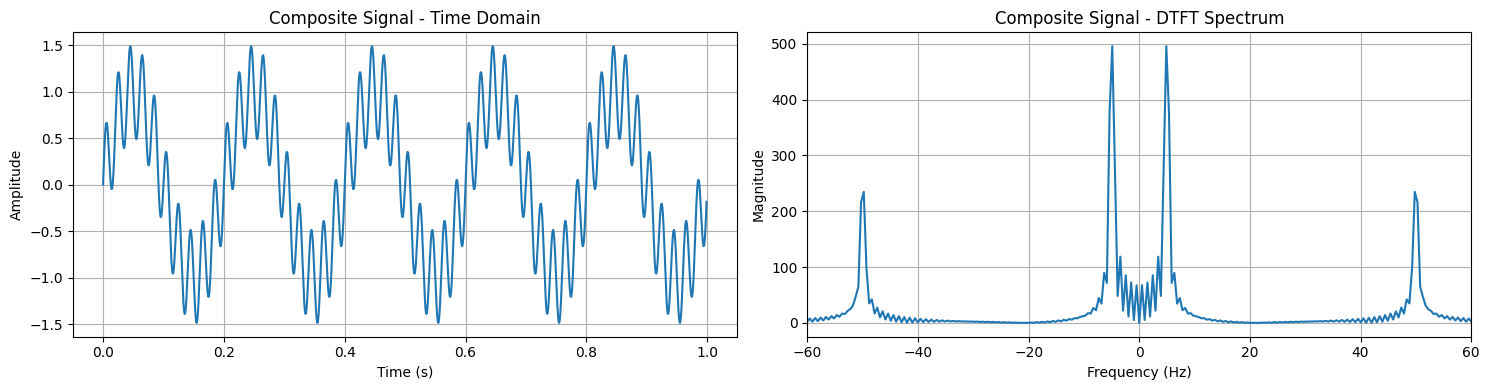

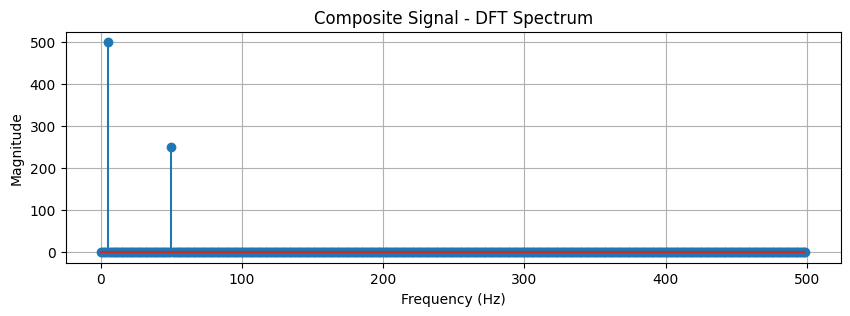

In [20]:
# Question 2: Composite Signal (e.g., 5 Hz and 50 Hz)
f2 = 50  # Another frequency (Hz)
amp2 = 0.5  # Amplitude for second sine wave
composite = sinusoid + amp2 * np.sin(2 * np.pi * f2 * t)

plot_time_and_freq(composite, "Composite Signal", dtft_range=(-60, 60))
plot_dft(composite, "Composite Signal")

# Time-Domain Waveform
The top left graph displays the time-domain waveform of the composite signal.

The x-axis represents time (s), and the y-axis shows amplitude.

The signal is no longer a simple, smooth sine wave. Instead, it shows a more complex oscillatory pattern due to the superposition of two or more sine waves.

The varying amplitude and intricacies in the pattern indicate the presence of multiple frequencies within the signal.

# DTFT Spectrum (Continuous Frequency Spectrum)
The top right graph shows the DTFT magnitude spectrum.

The x-axis is frequency (Hz), and the y-axis is magnitude.

There are distinct peaks at two major frequencies (near 5 Hz and 50 Hz), as well as their negative counterparts, which align with the frequencies used to construct the composite signal.

The spectrum clearly indicates that the signal consists of two main frequency components, which would correspond to the frequencies of the individual sinusoids used in the composite.

# DFT Spectrum (Discrete Frequency Spectrum)
The bottom graph presents the DFT spectrum with discrete magnitude values at specific frequency bins.

The x-axis is frequency (Hz) (up to the Nyquist frequency), and the y-axis is magnitude.

The two prominent spikes align with the chosen frequencies (e.g., 5 Hz and 50 Hz), confirming their presence in the sampled digital signal.

All other frequency bins have low magnitude, indicating that the signal's energy is concentrated at the main frequencies used to form the composite.

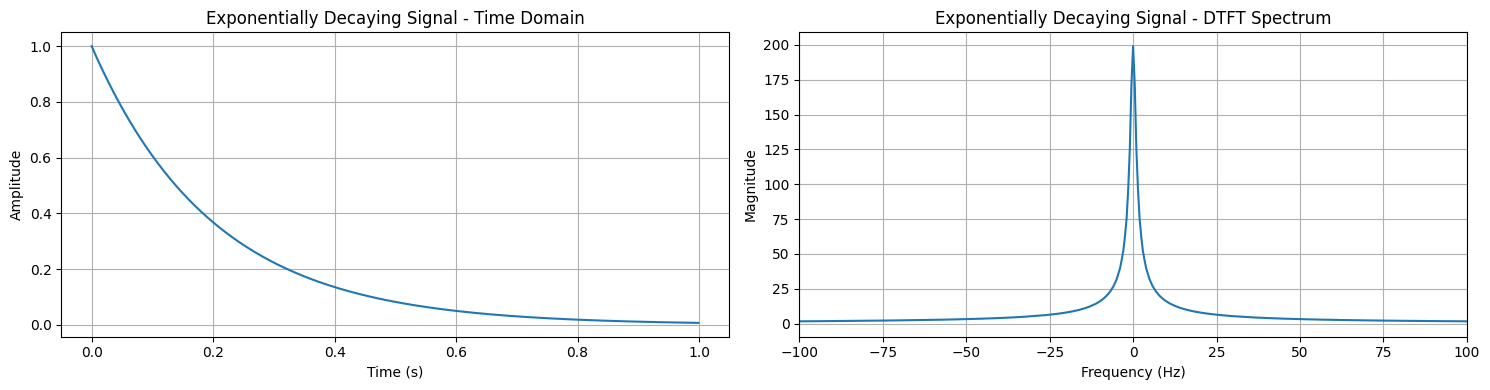

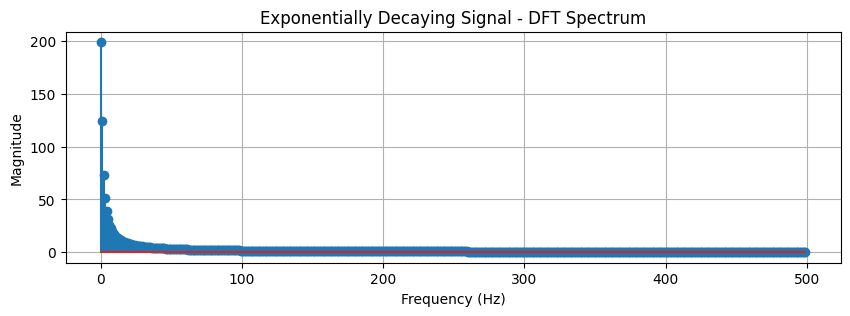

In [21]:
# Question 3: Exponentially Decaying Signal
decay_rate = 5  # Controls how quickly signal decays
expo = np.exp(-decay_rate * t)

plot_time_and_freq(expo, "Exponentially Decaying Signal", dtft_range=(-100, 100))
plot_dft(expo, "Exponentially Decaying Signal")

# Time-Domain Waveform
The top left plot shows the exponentially decaying signal in the time domain.

The x-axis is time (s), and the y-axis is amplitude.

The waveform starts at a maximum value and decays rapidly towards zero, reflecting how the signal’s energy is localized at the beginning and diminishes over time.

# DTFT Spectrum (Continuous Frequency Spectrum)
The top right plot presents the DTFT spectrum—the magnitude as a function of frequency.

The x-axis is frequency (Hz) and the y-axis is magnitude.

The spectrum has a single, broad central peak centered at 0 Hz (DC component).

The spread of the peak shows that the exponential signal contains many low-frequency components, with the energy concentrated near DC, and lower amplitudes at higher frequencies.

Unlike the previous sinusoids, there are no sharp spikes since the signal is not periodic; its rapid decay in time leads to a broad, continuous frequency distribution.

# DFT Spectrum (Discrete Frequency Spectrum)
The bottom plot shows the DFT spectrum, representing the amplitude at discrete frequency bins.

The x-axis is frequency (Hz) (up to the Nyquist frequency), and the y-axis is magnitude.

There is a prominent peak at 0 Hz, and the magnitude tapers off as the frequency increases.

This again confirms strong low-frequency content, as expected for a smooth, slowly-varying time-domain waveform.



In [22]:
# Analysis (for Q3):
print("Question 3 Analysis:")
print("The exponentially decaying signal is localized in time, causing its frequency spectrum to be broad and continuous (spread over many frequencies) due to the time-frequency uncertainty principle. The DFT shows peaks near zero frequency, consistent with the slowly changing (low-frequency) nature of the exponential in time.")

Question 3 Analysis:
The exponentially decaying signal is localized in time, causing its frequency spectrum to be broad and continuous (spread over many frequencies) due to the time-frequency uncertainty principle. The DFT shows peaks near zero frequency, consistent with the slowly changing (low-frequency) nature of the exponential in time.


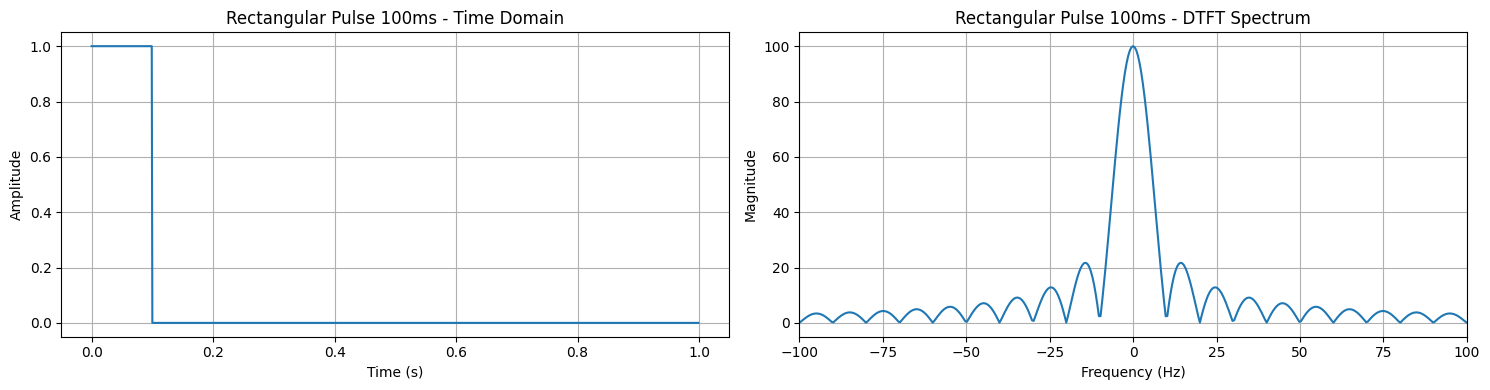

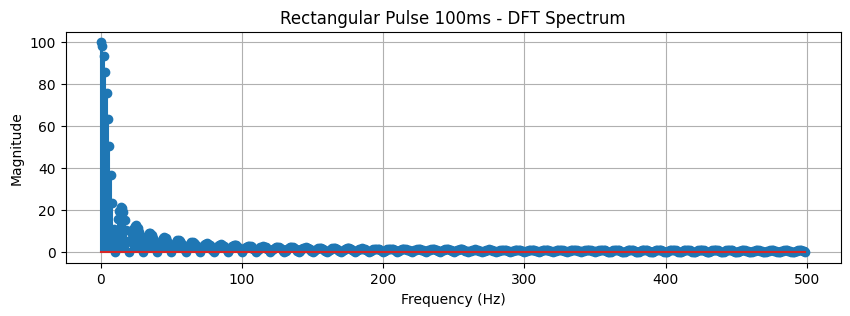

In [23]:
# Question 4: Rectangular Pulse Signal
pulse_width = 0.1  # seconds
rect = np.zeros(N)
rect[t < pulse_width] = 1

plot_time_and_freq(rect, f"Rectangular Pulse {pulse_width*1000:.0f}ms", dtft_range=(-100, 100))
plot_dft(rect, f"Rectangular Pulse {pulse_width*1000:.0f}ms")

# Time-Domain Waveform
The top left graph shows the rectangular pulse in the time domain.

The x-axis is time (s), and the y-axis is amplitude.

The waveform is a flat-topped rectangle with a value of 1 for the first 100 ms, after which it instantly drops to 0 and stays at 0 for the rest of the duration.

This sharp, sudden transition at the edge of the rectangle creates a discontinuity in the time domain.

# DTFT Spectrum (Continuous Frequency Spectrum)
The top right graph presents the DTFT (Discrete-Time Fourier Transform) spectrum.

The x-axis is frequency (Hz), and the y-axis is magnitude.

The spectrum exhibits a sinc function shape, with a prominent central lobe at 0 Hz and multiple smaller side lobes decreasing in amplitude as frequency increases.

This characteristic "sin(x)/x" (sinc) pattern is the mathematical Fourier transform of a rectangular pulse, showing that the signal has many frequency components, especially at lower frequencies, with energy gradually spreading out.

# DFT Spectrum (Discrete Frequency Spectrum)
The bottom graph shows the DFT (Discrete Fourier Transform) spectrum.

The x-axis is frequency (Hz) (up to the Nyquist frequency), and the y-axis is magnitude.

The DFT samples the same sinc-like spectrum at discrete frequency points, with high magnitude at DC and rapidly decreasing as the frequency increases.

All the features seen in the DTFT (main lobe and side lobes) appear as discrete spikes, consistent with the theory.

In [24]:
# Analysis (for Q4):
print("Question 4 Analysis:")
print("The rectangular pulse has a sharp transition in time, resulting in a sinc-shaped (sin(x)/x) frequency spectrum. The longer the pulse in time, the narrower the main lobe in the frequency domain. The DFT samples this sinc shape at discrete frequency intervals.")

Question 4 Analysis:
The rectangular pulse has a sharp transition in time, resulting in a sinc-shaped (sin(x)/x) frequency spectrum. The longer the pulse in time, the narrower the main lobe in the frequency domain. The DFT samples this sinc shape at discrete frequency intervals.
